  **1.- Describiendo los parámetros de un transito**

---

Las carácterísticas principales de la curva de luz, con las cuales se pueden obtener obtener características físicas del sistema son:

- Largo del tránsito: está determinodo por dos tiempos. El primero $t_F$, que es el periodo de tiempo en el cual el planeta está completamente contenido en la estrella, y un segundo tiempo $t_T$, que es el periodo en el cual la planeta oculta al menos una parte de la estrella.

- Profundidad del tránsito: Es la variación porcentual del tránsito e indica la relación entre entre el radio de la estrella y el radio del planeta.

$\frac{R_p}{R_*} = \sqrt{\Delta F} = \sqrt{\frac{F_{notransito}-F_{transito}}{F_{notransito}}}$

- Forma de la curva: nos da el ángulo del tránsito y el parámetro de impacto *b*, el semieje mayor *a*, el ángulo de inclinación del tránsito *i* y la densidad media de la estrella.

$b = \sqrt\frac{\left(1-\sqrt{\Delta F}\right)²-\left(1+\sqrt{\Delta F}\right)²\frac{sen²\left(\frac{t_F\pi}{P}\right)}{sen²\left(\frac{t_T\pi}{P}\right)}}{1-\frac{sen²\left(\frac{t_F\pi}{P}\right)}{sen²\left(\frac{t_T\pi}{P}\right)}}$

$a = R_*\sqrt\frac{\left(1+\sqrt{\Delta F}\right)²-b²cos²\left(\frac{t_T\pi}{P}\right)}{cos²\left(\frac{t_T\pi}{P}\right)}$

$i = arccos\left(\frac{bR_*}{a}\right)$

$\rho_* = \frac{4{\pi}²}{GP²}\left(\frac{\left(1+\sqrt{\Delta F}\right)²-b²cos²\left(\frac{t_T\pi}{P}\right)}{sin²\left(\frac{t_T\pi}{P}\right)}\right)^{3/2}$

Con eso se puede estimar la masa de la estrella, suponiendo que $M_* >> M_p$

$M_* = \frac{4{\pi}²a³}{GP²}$

Lo anterior es válido si asumimos algunas aproximaciones:

- La órbita del planeta es circular, es decir, $a = R_p$.

- La luz viene de una sola estrella y el tránsito de un solo planeta.

Fuentes:
> *http://iopscience.iop.org/article/10.1086/346105/pdf*

  **2.- Realizando curva de luz de KOI 1274.01**

---

Utilizamos el mismo código que para la tarea 2.1 para extraer la curva de luz y unir quarters.

El promedio de las medianas es: 66184.5366753


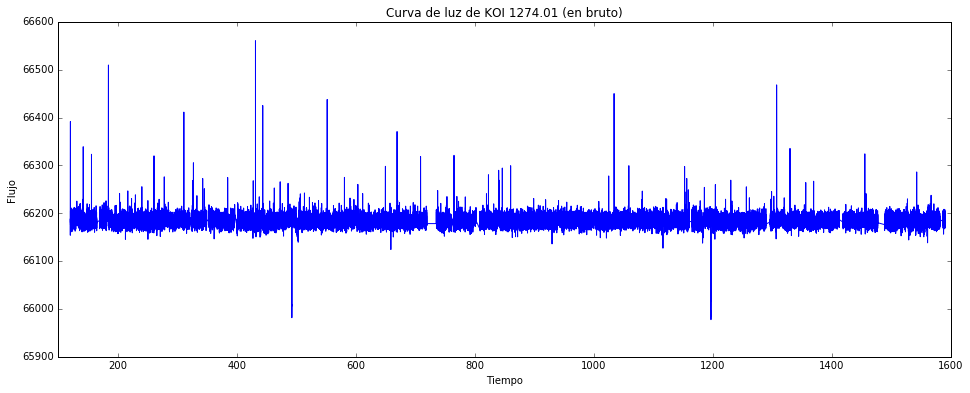

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import kplr
%matplotlib inline
client = kplr.API()

koi = client.koi(1274.01)
curva = koi.get_light_curves()

time, flux, ferr, quality = [], [], [], []

for lc in curva:
    with lc.open() as f:
        hdu_data = f[1].data
        times = hdu_data["time"]
        pdc_fluxes = hdu_data["pdcsap_flux"]
        #quitamos los elementos que sean "nan"
        idx = np.isnan(pdc_fluxes)
        time.append(times[~idx])
        flux.append(pdc_fluxes[~idx])
    
#determinamos la mediana de cada trozo discontinuo en la curva de luz
med = np.array([])
prom = 0

for i in range(len(flux)):
    med = np.append(med,np.median(flux[i]))
    
prom = np.mean(med)
print("El promedio de las medianas es:",prom)

#restamos a cada valor (punto) en el gráfico la diferencia entre la mediana de cada trozo y el promedio de las medianas
#para llevar los puntos a un mismo nivel. Esto corresponde a la parte 5 de la tarea.
for j in range(len(flux)):
    flux[j] = flux[j] - (med[j] - prom)

ejexn = np.array([])
ejeyn = np.array([])

for t in range(len(time)):
    ejexn = np.append(ejexn,time[t])
    ejeyn = np.append(ejeyn,flux[t])

#graficamos
fig, axis = plt.subplots(figsize=(16,6))
axis.plot(ejexn,ejeyn)
plt.xlim(100,1600)
axis.set_xlabel('Tiempo')
axis.set_ylabel('Flujo')
plt.title('Curva de luz de KOI 1274.01 (en bruto)')
plt.show()

Usamos *median filter* para eliminar fluctuaciones.

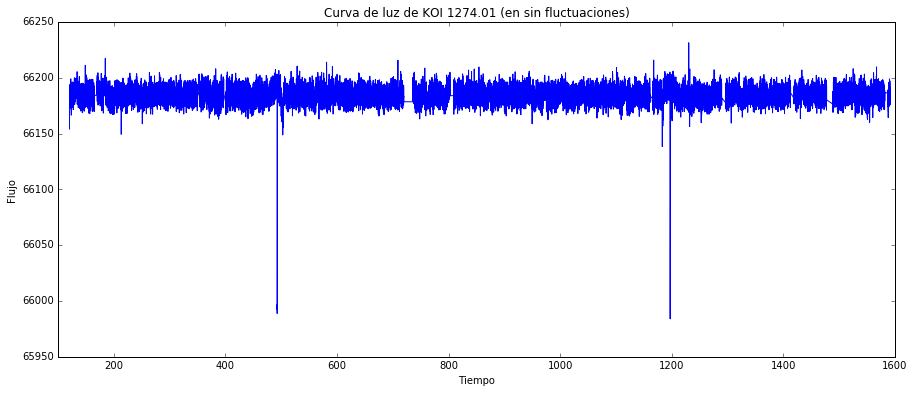

In [2]:
import scipy.signal as sg

flujo = sg.medfilt(ejeyn)

fig, axis = plt.subplots(figsize=(15,6))
axis.plot(ejexn,flujo)
plt.xlim(100,1600)
axis.set_xlabel('Tiempo')
axis.set_ylabel('Flujo')
plt.title('Curva de luz de KOI 1274.01 (en sin fluctuaciones)')
plt.show()

Ahora normalizamos el flujo y faseamos

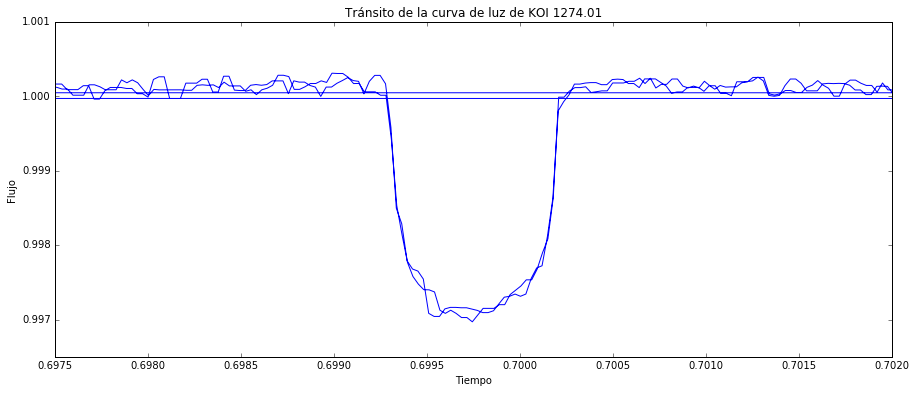

In [3]:
suma = 0.0
num = 0.0

for t in range(len(flujo)):
    if flujo[t] > 0:
        suma = suma + flujo[t]
        num = num + 1

for t in range(len(ejexn)):
    flujo[t] = flujo[t]/prom

for t in range(len(ejexn)):
    ejexn[t] = ((ejexn[t]/704.2)%1)
    
fig, axis = plt.subplots(figsize=(15,6))
axis.plot(ejexn,flujo)
plt.xlim(0.6975,0.702)
axis.set_xlabel('Tiempo')
axis.set_ylabel('Flujo')
plt.title('Tránsito de la curva de luz de KOI 1274.01')
plt.show()

Dilatamos el eje x para observar mas claramente los tiempos

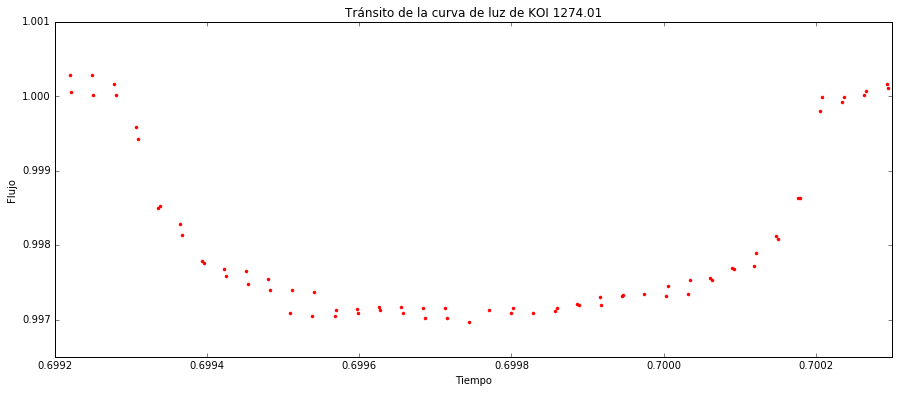

In [4]:
fig, axis = plt.subplots(figsize=(15,6))
axis.plot(ejexn,flujo,'.r')
plt.xlim(0.6992,0.7003)
axis.set_xlabel('Tiempo')
axis.set_ylabel('Flujo')
plt.title('Tránsito de la curva de luz de KOI 1274.01')
plt.show()

De la curva de luz se ve que:

$\Delta F = 0.003$

$t_F = 0.35$ días

$t_T = 0.63$ días

Fuentes:
> *http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html*

  **3.- Interpretación física de los resultados para KOI 1274.01**

---

Utilizamos el radio de la estrella (obtenido de la literatura) y las ecuaciones de la parte 1 para obtener los parámetros ahí indicados

In [5]:
import numpy as np

Re = 0.76 # radio de la estrella (radios solares)
G = 6.67*10**(-11)*2*10**(30)*(60*60*24)**2/((7*10**8)**3) # constante de gravitación universal (radio solar³*masa solar*dia²)
P = 704.2 # periodo
DF = 0.003 # diferencia de flujo
tF = 0.35 # tiempo de eclipsación total
tT = 0.63 # tiempo de eclipsación parcial y total

Rp = Re*np.sqrt(DF)
Rpn = Rp*7*10**8/(6371*10**3)   #Ro * m/Ro *
print('El radio del planeta es:',Rpn,'radios terrestres')

b = np.sqrt(((1-DF)**2-(1+DF)**2*((np.sin(tF*np.pi/P))**2/(np.sin(tT*np.pi/P))**2))/(1-(np.sin(tF*np.pi/P))**2/(np.sin(tT*np.pi/P))**2))
print('El parámetro de impacto es:',b)

a = Re*np.sqrt(((1+np.sqrt(DF))**2-b**2*(np.cos(tT*np.pi/P))**2)/((np.sin(tT*np.pi/P))**2))
an = a*700*10**3/(150*10**6)
print('El semieje mayor es:',an,'unidades astronómicas')

i = np.arccos(b*Re/a)
inu = i*180/np.pi
print('El ángulo de inclinación es:',inu,'grados')

rhoe = (4*np.pi**2/(G*P**2))*(((1+np.sqrt(DF))**2-b**2*(np.cos(tT*np.pi/P))**2)/((np.sin(tT*np.pi/P))**2))**(3/2)
print('La densidad media de la estrella es:',rhoe,'densidades solares')

Me = rhoe*4*np.pi*Re**3/3
print('La masa de la estrella es:',Me,'masas solares')

El radio del planeta es: 4.57366819326 radios terrestres
El parámetro de impacto es: 0.994309731943
El semieje mayor es: 0.444184126807 unidades astronómicas
El ángulo de inclinación es: 89.545110174 grados
La densidad media de la estrella es: 0.0538649777965 densidades solares
La masa de la estrella es: 0.0990457560154 masas solares


El radio del planeta nos indica que es un planeta de similar tamaño a Neptuno. El semieje mayor nos dice que transita a menos de la mitad de la distancia Tierra-Sol, por lo que, si estuviera en el sistema solar, su órbita estaría un poco más alejada del sol que la de Mercurio. El ángulo de inclinación es razonable, muy cercano a 90°, que es lo que esperaríamos para un planeta que genera tránsito.
La masa de la estrella es la masa de una enana roja.

Fuentes:
> *http://www.openexoplanetcatalogue.com/planet/Kepler-421%20b/*

> *https://es.wikipedia.org/wiki/Constante_de_gravitaci%C3%B3n_universal*

  **4.- Ajuste de un modelo al tránsito en la curva de luz de KOI 1274.01**

---

Para hacer el ajuste, primero instalamos batman por consola con el comadndo *pip install batman-package*

Ahora jugamos con los parámetros para ver distintas curvas de luz:

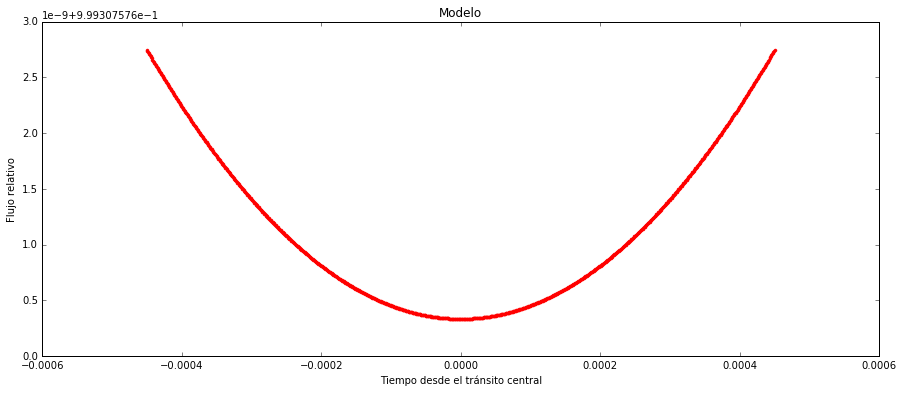

In [6]:
import batman

params = batman.TransitParams()             #object to store transit parameters
params.t0 = 0.                              #time of inferior conjunction
params.per = P                              #orbital period
params.rp = Rp/Re                           #planet radius (in units of stellar radii)
params.a = a/Re                             #semi-major axis (in units of stellar radii)   ???????
params.inc = inu                            #orbital inclination (in degrees)
params.ecc = 0.                             #eccentricity
params.w = 160.                             #longitude of periastron (in degrees)  ?????
params.limb_dark = "quadratic"              #limb darkening model
params.u = [0.728, 0.203]                   #limb darkening coefficients

t = np.linspace(-0.00045, 0.00045, 1000)    #times at which to calculate light curve
m = batman.TransitModel(params, t)          #initializes model
flu = m.light_curve(params)                 #calculates light curve

fig, axis = plt.subplots(figsize=(15,6))
axis.plot(t,flu,'r.')
#plt.xlim(-0.001,0.001)
#plt.ylim(1,6)
plt.xlabel("Tiempo desde el tránsito central")
plt.ylabel("Flujo relativo")
plt.title('Modelo')
plt.show()

Fuentes:
> *http://kurucz.harvard.edu/*

> *http://www.astro.puc.cl/~ajordan/grav_4.5_lh_1.25.dat*

> *http://astro.uchicago.edu/~kreidberg/batman/tutorial.html*

> *http://arxiv.org/pdf/1507.08285v3.pdf*

> *https://github.com/lkreidberg/batman/blob/master/batman/transitmodel.py*